## Assignment 03 - Obeject Counting on a Conveyor Belt 
Name - **D.M.S.S.Dissanayake**   
Index No - **190155L**

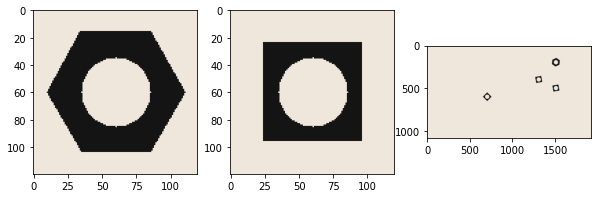

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

hexnut_template -> threshold value =  20.0
squarenut_template -> threshold value =  20.0
conveyer_f100 -> threshold value =  20.0


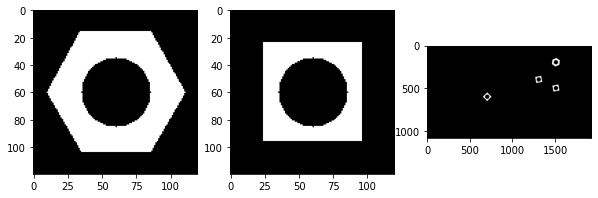

In [2]:
# Converting images to grayscale
hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Applying Otsu's thresholding the images
ret1, hexnut_thresh = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
ret2, sqrnut_thresh = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
ret3, conveyor_thresh= cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

print("hexnut_template -> threshold value = ",ret1)
print("squarenut_template -> threshold value = ",ret2)
print("conveyer_f100 -> threshold value = ",ret3)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_thresh, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(sqrnut_thresh, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_thresh, cv.COLOR_RGB2BGR))

plt.show()

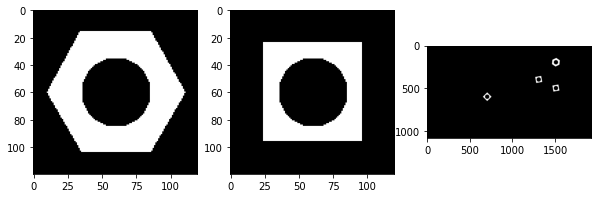

In [3]:
# Apply morphological closing on the images
kernel = np.ones((3,3),np.uint8)
hexnut_closing = cv.morphologyEx(hexnut_thresh, cv.MORPH_CLOSE, kernel).astype(np.uint8)
sqrnut_closing = cv.morphologyEx(sqrnut_thresh, cv.MORPH_CLOSE, kernel).astype(np.uint8)
conveyor_closing = cv.morphologyEx(conveyor_thresh, cv.MORPH_CLOSE, kernel).astype(np.uint8)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_closing, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(sqrnut_closing, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_closing, cv.COLOR_RGB2BGR))
plt.show()

Connected components Analysis on Hex Nut Image

No.of connected components =  2 (Background is also considered as a connected component)
---Statistics---
h = 88
w = 101
c = 60px, 59px


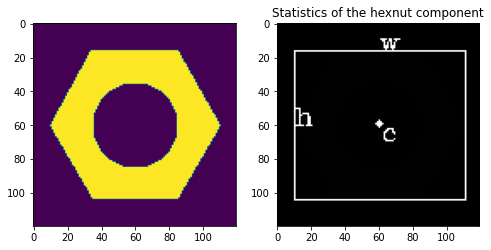

In [4]:
connectivity = 4  
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(hexnut_closing, connectivity , cv.CV_32S)

print("No.of connected components = ", num_labels, "(Background is also considered as a connected component)")
x,y,w,h = stats[1][0],stats[1][1],stats[1][2],stats[1][3] # data of the square enclosing hexnut component
centroidx,centroidy = round(centroids[1][0]),round(centroids[1][1])
print(f"---Statistics---")
print(f'h = {h}\nw = {w}\nc = {centroidx}px, {centroidy}px')

fig, ax = plt. subplots(1,2, figsize=(8,8))
ax[0].imshow(labels)
cv.rectangle(labels, pt1=(x,y), pt2=(x+w,y+h), color=(255,255,255), thickness=1)
cv.circle(labels,(centroidx, centroidy), 2, (255,255,250), -1)
cv.putText(labels,'h' , (x,int(y+h/2)), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,250,255), 1, cv.LINE_AA)
cv.putText(labels,'w' , (int(x+w/2),y), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,250,255), 1, cv.LINE_AA)
cv.putText(labels,'c' , (centroidx+1,centroidy+10), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,250,255), 1, cv.LINE_AA)
ax[1].imshow(labels, cmap = 'gray')
ax[1].set_title("Statistics of the hexnut component")

plt.show()


Connected components Analysis on Square Nut Image

No.of connected components =  2 (Background is also considered as a connected component)
---Statistics---
h = 72
w = 72
c = 59px, 59px


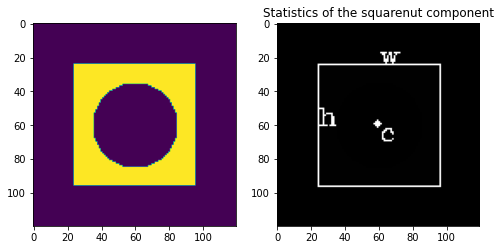

In [5]:
connectivity = 4  
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(sqrnut_closing, connectivity , cv.CV_32S)

print("No.of connected components = ", num_labels, "(Background is also considered as a connected component)")
x,y,w,h = stats[1][0],stats[1][1],stats[1][2],stats[1][3] # data of the square enclosing squarenut component
centroidx,centroidy = round(centroids[1][0]),round(centroids[1][1])
print(f"---Statistics---")
print(f'h = {h}\nw = {w}\nc = {centroidx}px, {centroidy}px')

fig, ax = plt. subplots(1,2, figsize=(8,8))
ax[0].imshow(labels)
cv.rectangle(labels, pt1=(x,y), pt2=(x+w,y+h), color=(255,255,255), thickness=1)
cv.circle(labels,(centroidx, centroidy), 2, (255,255,250), -1)
cv.putText(labels,'h' , (x,int(y+h/2)), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,250,255), 1, cv.LINE_AA)
cv.putText(labels,'w' , (int(x+w/2),y), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,250,255), 1, cv.LINE_AA)
cv.putText(labels,'c' , (centroidx+1,centroidy+10), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,250,255), 1, cv.LINE_AA)
ax[1].imshow(labels, cmap = 'gray')
ax[1].set_title("Statistics of the squarenut component")

plt.show()

No.of connected components =  5 (Background is also considered as a connected component)
---Statistics of Component 1---
h = 100
w = 92
Area = 4636
c = 1499px, 199px
---Statistics of Component 2---
h = 82
w = 82
Area = 3087
c = 1299px, 399px
---Statistics of Component 3---
h = 82
w = 82
Area = 3087
c = 1499px, 499px
---Statistics of Component 4---
h = 101
w = 101
Area = 3144
c = 700px, 600px


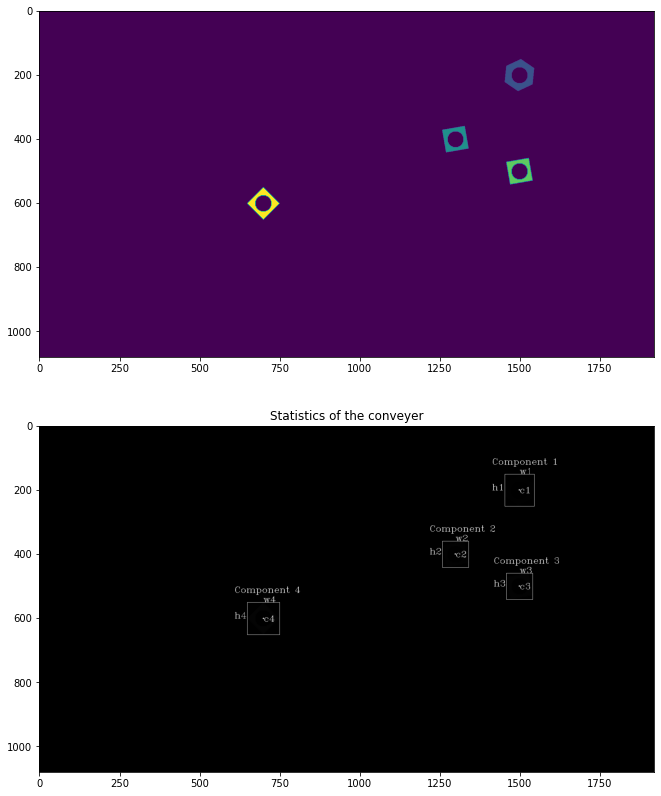

In [6]:
connectivity = 4  
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(conveyor_closing , connectivity , cv.CV_32S)

print("No.of connected components = ", num_labels, "(Background is also considered as a connected component)")

fig, ax = plt. subplots(2,1, figsize=(16,14))
ax[0].imshow(labels)

for i in range(1,num_labels):

    x,y,w,h,A = stats[i][0],stats[i][1],stats[i][2],stats[i][3],stats[i][4]
    centroidx,centroidy = round(centroids[i][0]),round(centroids[i][1])
    print(f"---Statistics of Component {i}---")
    print(f'h = {h}\nw = {w}\nArea = {A}\nc = {centroidx}px, {centroidy}px')

    cv.rectangle(labels, pt1=(x,y), pt2=(x+w,y+h), color=(255,255,255), thickness=1)
    cv.circle(labels,(centroidx, centroidy), 2, (255,255,250), -1)
    cv.putText(labels,'h'+str(i) , (x-40,int(y+h/2)), cv.FONT_HERSHEY_COMPLEX, 0.9, (255,255,255), 1, cv.LINE_AA)
    cv.putText(labels,'w'+str(i) , (int(x+w/2),y), cv.FONT_HERSHEY_COMPLEX, 0.9, (255,255,255), 1, cv.LINE_AA)
    cv.putText(labels,'c'+str(i) , (centroidx+1,centroidy+10), cv.FONT_HERSHEY_COMPLEX, 0.9, (255,255,255), 1, cv.LINE_AA)
    cv.putText(labels,'Component '+str(i) , (x-40,y-30), cv.FONT_HERSHEY_COMPLEX, 0.9, (255,255,255), 1, cv.LINE_AA)

labels = labels.astype(np.uint8)
ax[1].imshow(labels, cmap = 'gray')
ax[1].set_title("Statistics of the conveyer")

plt.show()

In [61]:
print(hexnut_closing.shape[0])
print(hexnut_closing.shape[1])

120
120


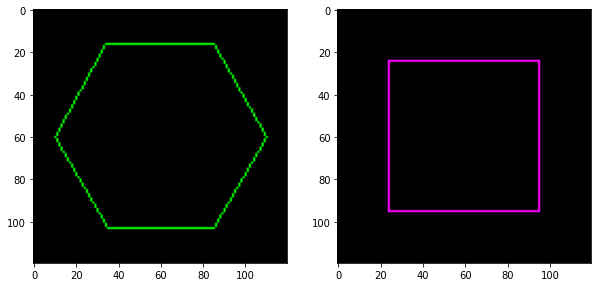

In [67]:
# Finding the contours of the Hexnut and squarenut template images
hexnut_contours, hierarchy1 = cv.findContours(hexnut_closing, 2, 1)
sqrnut_contours, hierarchy2 = cv.findContours(sqrnut_closing, 2, 1)

im1 = np.zeros((120, 120, 3)).astype(np.uint8)
im2 = np.zeros((120, 120, 3)).astype(np.uint8)

cv.drawContours(im1, hexnut_contours[0], -1, (0,255,0), 1)
cv.drawContours(im2, sqrnut_contours[0], -1, (255,0,255), 1)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))

plt.show()

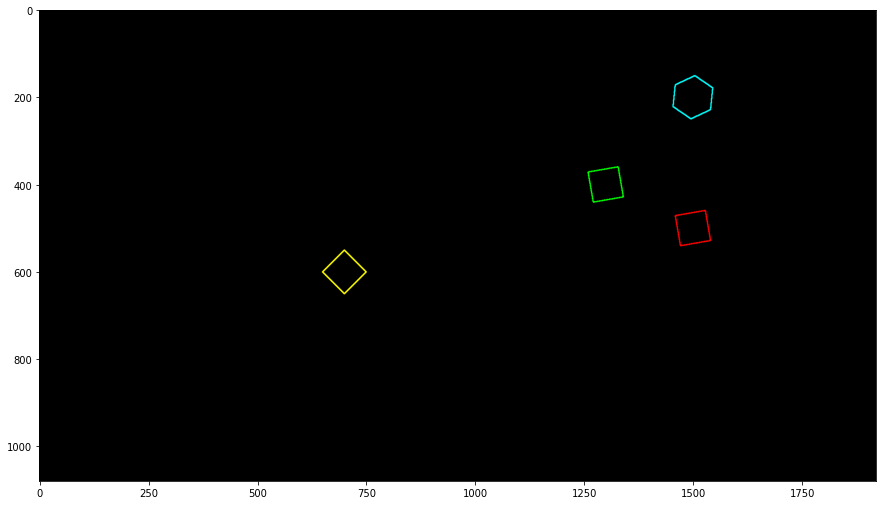

In [59]:
# Finding the contours of the conveyor template
conveyor_contours, hierarchy3 = cv.findContours(conveyor_closing, 2, 1)
im3 = np.zeros((1080, 1920, 3)).astype(np.uint8)
cv.drawContours(im3, conveyor_contours, 0, (0,255,255), 2)
cv.drawContours(im3, conveyor_contours, 2, (0,0,255), 2)
cv.drawContours(im3, conveyor_contours, 4, (0,255,0), 2)
cv.drawContours(im3, conveyor_contours, 6, (255,255,0), 2)


plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
plt.show()


# Detecting Objects on a Synthetic Conveyor

In [9]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [10]:
hexnut_count = 0
# Matching hexnut contour with the conveyor contours
for i in range(len(conveyor_contours)):
    hexnut_err = cv.matchShapes(hexnut_contours[0],conveyor_contours[i],1,0.0)
    if hexnut_err < 0.0001:
        hexnut_count+=1

print("Number of hex Nuts = ", hexnut_count)

Number of hex Nuts =  1


conveyor_f100.png --> hexnut_count = 1 | squarenut_count = 3
conveyor_f101.png --> hexnut_count = 1 | squarenut_count = 3


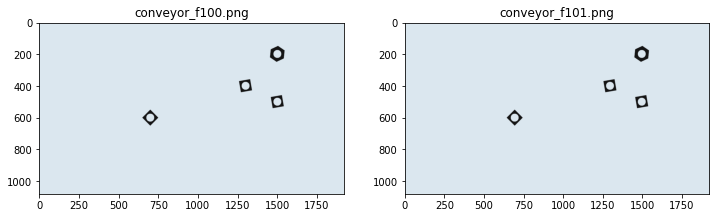

In [28]:
# Experimentation - Finding a suitable error value to detect the hexnuts and squarenuts
im_names = ['conveyor_f100.png', 'conveyor_f101.png']

fig, ax = plt. subplots(1,2, figsize=(12,10))

for i in range(0,2):
    im =  cv.imread(im_names[i], cv.IMREAD_COLOR)
    im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    ret, im_thres = cv.threshold(im_gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
    im_contours, hierarchy = cv.findContours(im_thres, 2, 1)
    hexnut_count, sqrnut_count = 0,0
    
    # Finding Matching contours in conveyor image to hexnut contour
    for j in range(len(im_contours)):
        err_hex = cv.matchShapes(hexnut_contours[0],im_contours[j],1,0.0)
        err_square= cv.matchShapes(sqrnut_contours[0],im_contours[j],1,0.0)
        # Detecting the hexnuts in the conveyor image
        if err_hex < 0.001:
            hexnut_count+=1
        # Detecting the squarenuts in the conveyor image    
        if err_square < 0.001:
            sqrnut_count+=1

    print(f'{im_names[i]} --> hexnut_count = {hexnut_count} | squarenut_count = {sqrnut_count}')
    ax[i].imshow(im)
    ax[i].set_title(im_names[i])
    plt.show



In [27]:
frame_array = []
shape = (1080, 1920, 3)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
total_obj = 0 # total object count upto current frame
prev=0 
kernel = np.ones((3,3),np.uint8)
while cap.isOpened():                             
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    # Applying morphological closing on the frame
    fr_gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    ret,fr_thresh = cv.threshold(fr_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    fr_closing=cv.morphologyEx(fr_thresh, cv.MORPH_CLOSE, kernel)

    contours,hierarchy = cv.findContours(fr_closing,2,1)
    obj_count=0
    for i in range(len(contours)):

        # Finding matching contours
        err_hex = cv.matchShapes(hexnut_contours[0],contours[i],1,0.0)
        err_square= cv.matchShapes(sqrnut_contours[0],contours[i],1,0.0)
    
        # Detecting objects using the error
        if ((err_hex<0.001) or (err_square<0.001)):
            obj_count+=1
            
    if (prev<obj_count):
        total_obj +=(obj_count-prev)

    prev=obj_count        
    f += 1
    text = 'Frame = ' + str(f) +' '+ '| Current count = ' + str(obj_count) + " | Total object count = "+ str(total_obj)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (140,0,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

# Writing the video

out = cv.VideoWriter('conveyor_result_190155L.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting.
